# The “fundamental problem” of authorship attribution.
by M Koppel, J Schler, S Argamon, Y Winter

<span style="font-family:Papyrus; font-size:10px;">authorship attribution = ייחוס מחבר</span>



# [We were promised video clip](https://www.youtube.com/watch?v=pQHX-SjgQvQ)

# First things first - what is NLP (natural language processsing)
NLP is a subfield of computer science in particular concer with problem: 

How to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.


Since the distant 1964, when, as is commonly believed, one of the first attempts was made by Mosteller and Wallace to use statistical analysis approach to attribute authorship of Federalist paper and to this day with rapid development of ML, de facto it became the tool for problems in the authorship analysis field.

![Wallace](https://historyofinformation.com/images/Screen_Shot_2020-09-12_at_7.43.27_PM_big.png)
![Mosteller](https://historyofinformation.com/images/Screen_Shot_2020-09-12_at_7.46.42_PM_big.png)

# Authorship analysis
Includes the following subtasks:

* authorship profiling/characterization
* similarity/plagiarism detection
* authorship attribution

# Authorship profiling/characterization
Determines the author's profile of the characteristics of the author: gender, educational background, age, etc...

# Similarity/plagiarism detection
Compares multiple pieces of work and determines whether or not they are produced by a single author withoud necessarily identifying the author, often used in the context of plagiarism detection.

# Authorship attribution
Concerned with the identification of the real author of a disputed anonymous document

# Fundamental problem
of authorship attribution: determining if two, possibly short, documents were written by a single author. A solution to this problem can serve as a building block for solving almost any conceivable authorship attribution problem.

# Hello world problem
Given a small closed set of candidate authors asked to attribute an anonymous test to one of them.

Usually, it is assumed that we have copious quantities of text by each candidate author and that the anonymous text is reasonably long.

# Real world problem
![slap](https://media.giphy.com/media/htiVRuP7N0XK/giphy.gif)

* list of candidates very large
* no guarantee that the true author of disputed text is even among the candidates
* writing by each candidate might be very limited
* anonymous text is short

# "Fundamental problem" of authorhip attribution
given two (possibly short) documents, determine if they were written by a single author or not.

Plainly, if we can solve the fundamental problem, we can solve any of the standard authorship attribution problems, whether in the idealized form often considered or in the more difficult form typically encountered in real life.

# by reduction from "fundamental" to any another problem

<img src="https://i0.wp.com/ric.org.il/wp-content/uploads/2021/05/Gila_Morgensterm.jpg?width=120&amp;height=80" width="300" height="300">



# The main idea of proposed approach
Given two input texts: X and Y. Generate a set of impostors.

Then check if Y can be singled out from among the impostors as the most likely author of X

# The main idea of proposed approach
Given two input texts, X and Y, we generate a set of impostors (Y1, . . ., Yn) and then using developed algorigthm to determine if X was written by Y or any of the impostors or by none of them. If and only if we obtain that X was written by Y with a sufficiently high score, we say that the two documents are by a single author. (Clearly, we can additionally, or alternatively, generate impostors X1, . . ., Xn and compare them to Y.)

# Automated techiques for authorhip attribution 
* similarity based
* machine learning

# Similarity based techique
some metric is used to measure the distance between two documents, and an anonymous document is attributed to that author whose known writing is most similar.

## Main focus
* choice of features for document representation
* methods for dimensionality reduction of feature space (for example PCA - Principal Components Analysis)
* choice of distance metric (Euclidean distance, cosine similarity, Dice's coefficient, Burrow's Delta and more)

# Machine learning techique
the known writings of each candidate author are used to construct a classifier that can then be used to classify anonymous documents.

## Main focus
* choice of features for document representation
* choice of learning algorithms

# ML vs Similarity based
Observed in multiple studies that when there are very many candidate authors, similarity-based methods are more appropriate than machine-learning methods.

# Similarity based techique principles
The basic idea is that the most reasonable attribution can be found by viewing each document as a point in some multidimensional space, and assigning a questioned document to the author whose documents as a whole are ‘‘closest’’, according to some appropriate distance measure.

In [166]:
love_nlp = "Sasha love NLP"
love_nutella = "Sasha love Nutella"
love_nobody = "Who is there?"

documents = [love_nlp, love_nutella, love_nobody]

In [167]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['love_nlp', 'love_nutella', 'love_nobody'])
df

,is,love,nlp,nutella,sasha,there,who
love_nlp,0,1,1,0,1,0,0
love_nutella,0,1,0,1,1,0,0
love_nobody,1,0,0,0,0,1,1


In [168]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(df, df)
print(similarities)

[[1.         0.66666667 0.        ]
 [0.66666667 1.         0.        ]
 [0.         0.         1.        ]]


![](https://media.giphy.com/media/BmmfETghGOPrW/giphy.gif)
![](https://studymachinelearning.com/wp-content/uploads/2019/09/Cosine-similarity-Wikipedia.png)

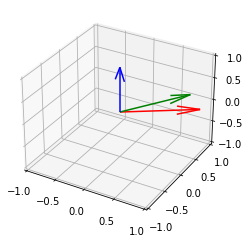

In [171]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

u = similarities[0]
v = similarities[1]
q = similarities[2]

ax = plt.axes(projection = '3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

start = [0,0,0]
ax.quiver(start[0], start[1], start[2], u[0], u[1], u[2], color='r')
ax.quiver(start[0], start[1], start[2], v[0], v[1], v[2], color='g')
ax.quiver(start[0], start[1], start[2], q[0], q[1], q[2], color='b')

# Dataset 
10k blogs harvested in Aug 2004 from blogger.com.

Dataset ib balanced for gender within each of a number of age intervals.

Blogs predominantly in English and contain sufficient text.

For each blog 2k words choosen as training data - **known text**, and **snippet** - last five hundred words of the blog.

Such as we would like to determine if one of the authors of the known text is author of the snippet.

# Feature representation
Each text: known text and snippet is represented as space-free character 4-gram, with following definition:
* a string of characters of length four that includes no spaces
* a string of four or fewer characters surrounded by spaces

Character n-grams have been shown to be effective for authorship attribution and have the advantage of being measurable in any language without specialized background knowledge.

In [181]:
cv = CountVectorizer(ngram_range=(4, 4), analyzer="char").fit(["So how are you so far people?"])
print(cv.vocabulary_)

{'so h': 22, 'o ho': 13, ' how': 2, 'how ': 11, 'ow a': 16, 'w ar': 24, ' are': 0, 'are ': 7, 're y': 20, 'e yo': 8, ' you': 5, 'you ': 25, 'ou s': 15, 'u so': 23, ' so ': 4, 'so f': 21, 'o fa': 12, ' far': 1, 'far ': 10, 'ar p': 6, 'r pe': 19, ' peo': 3, 'peop': 17, 'eopl': 9, 'ople': 14, 'ple?': 18}


100k most frequent ngrams selected among 250k as feature universe

# Algorithm

<img src="./assets/image.png" width="900">

# "unmasking" - Randomly choose some fraction k2 of the full feature set

The known text of a snippet’s actual author is likely to be the text most similar to the snippet even as we vary the feature set that we use to represent the texts.

Another author’s text might happen to be the most similar for one or a few specific feature sets, but it is highly unlikely to be consistently so over many different feature sets.



# Experiment
k1 (number of iterations) = 100

k2 (fraction of feature universe)  = 40%

L1 (length of snippet) = 500

L2 (length of know text) = 2000

# Result
* high precision relates to a low false positive rate
* high recall relates to a low false negative rate

Consider how the number of candidate authors affects precision and recall

<img src="./assets/precision_recall.png" width="600">

Accuracy increases as the number of candidate authors diminishes.

By varying the threshold for identifying an input pair as being by the same author, we control the trade-off between precision and recall.

For 1k candidates, at ϑ* = 0.9, achieved 93.2 per cent precision at 39.3 per cent recall.

# Research results address following questions:
* How many impostors should be used?
* How should the impostors be chosen?
* What score should we require in order to conclude that two documents are by a single author

# How should the impostors be chosen?
Given a pair <X,Y> identify the 250 most similar blog posts to Y.

Randomly choose 25 blog posts from among these to serve as impostors

# Critical thinking
* Process of choosing candidate imposters are not compared with different approaches, no evidence how this techique better than another
* Process of choosing 2k words as training dataset is not clear and not desctibed
* feature selection is no


# Thank you
![](https://media.giphy.com/media/rrj7FpUH9BlK0/giphy.gif)

In [152]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [153]:
love_nlp = "Sasha love NLP"
love_nutella = "Sasha love Nutella"
love_nobody = "Who is there?"

doc_election = "Sasha love NL"



doc_recipe = "Who is there?"
# documents = [doc_trump, doc_election, doc_putin, doc_recipe]
documents = [love_nlp, love_nutella, love_nobody]


In [154]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['love_nlp', 'love_nutella', 'love_nobody'])
df

,is,love,nlp,nutella,sasha,there,who
love_nlp,0,1,1,0,1,0,0
love_nutella,0,1,0,1,1,0,0
love_nobody,1,0,0,0,0,1,1


In [155]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(df, df)
print(similarities)

[[1.         0.66666667 0.        ]
 [0.66666667 1.         0.        ]
 [0.         0.         1.        ]]


No handles with labels found to put in legend.


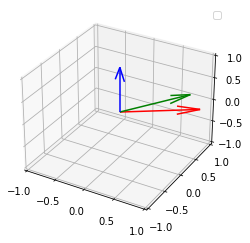

In [162]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np

u = similarities[0]
v = similarities[1]
q = similarities[2]
# w = similarities[3]

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.legend()
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

start = [0,0,0]
ax.quiver(start[0], start[1], start[2], u[0], u[1], u[2], color='r')
ax.quiver(start[0], start[1], start[2], v[0], v[1], v[2], color='g')
ax.quiver(start[0], start[1], start[2], q[0], q[1], q[2], color='b')